### Using data from SEADE to generate graphics with deaths per city of São Paulo

This program will download official information from the estate of São Paulo to plot graphics of deaths per target city.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Download dos dados mais atuais
loadCOVID19SP = 'https://github.com/seade-R/dados-covid-sp/raw/master/data/dados_covid_sp.csv'
## Caso esteja sem conexão, pode utilizar os últimos dados disponíveis:
#loadCOVID19SP.to_csv('/dados_covid_sp.csv')

DataCOVID19SP = pd.read_csv(loadCOVID19SP,
                      delimiter=';', 
                      encoding='utf-8',
                      decimal=',',
                      parse_dates=['datahora'])

#Salvando um backup
DataCOVID19SP.to_csv ('dados_covid_sp.csv', header=True)
DataCOVID19SP = DataCOVID19SP[['nome_munic','datahora','obitos_mm7d','obitos_pc']]

DataCOVID19SP['datahora'].tail(1)
#You can see on the datahora bellow what is the last update date.

94719   2020-07-21
Name: datahora, dtype: datetime64[ns]

Text(0.5, 1.0, 'Óbitos de São Paulo - Média Móvel de 7 dias')

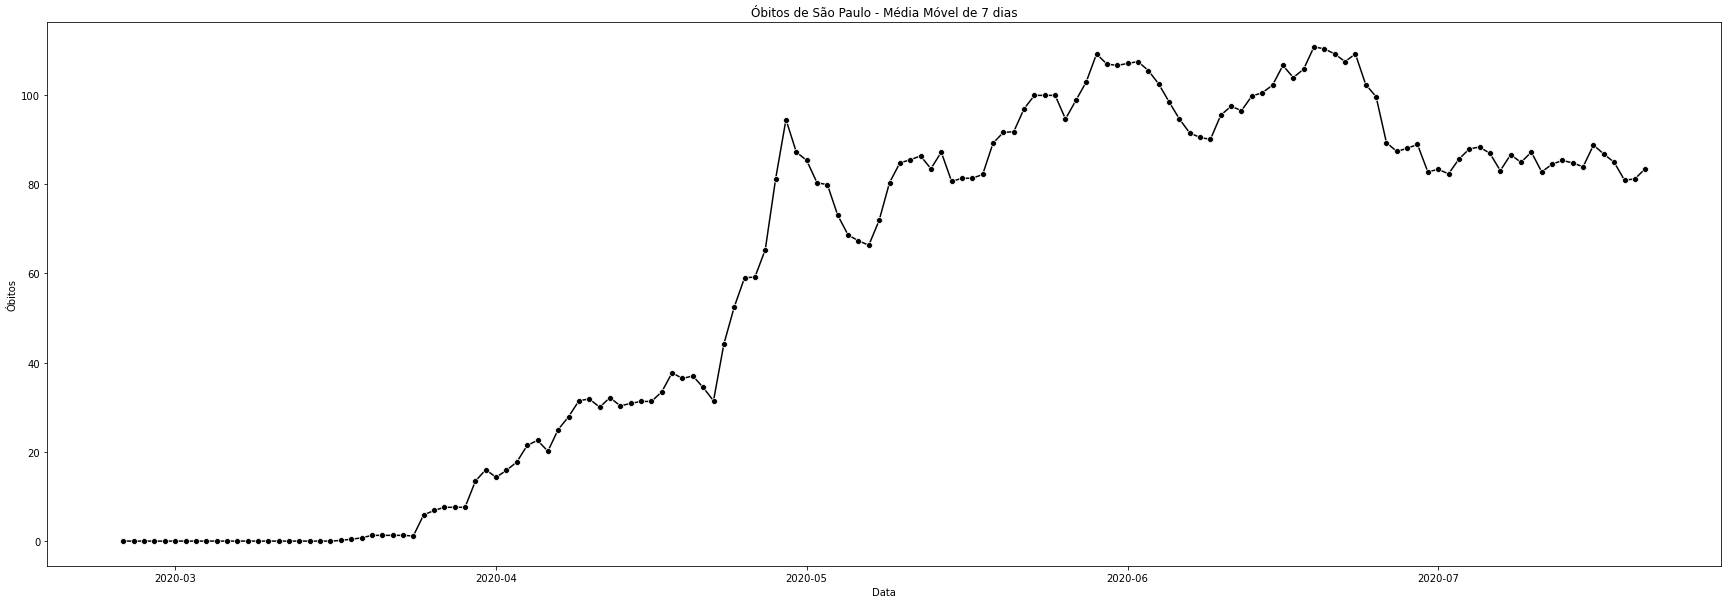

In [2]:
#Gráfico simples com óbitos somente para uma cidade.
obitos_mm7d_SaoPaulo = DataCOVID19SP[DataCOVID19SP['nome_munic'] == 'São Paulo']

plt.figure(figsize=(30,10))
sns.lineplot(x='datahora',y='obitos_mm7d', color="black", marker='o', data=obitos_mm7d_SaoPaulo)

plt.xlabel('Data')
plt.ylabel('Óbitos')
plt.title('Óbitos de São Paulo - Média Móvel de 7 dias')

Text(0.5, 1.0, 'Óbitos de São Paulo por 100K Habitantes')

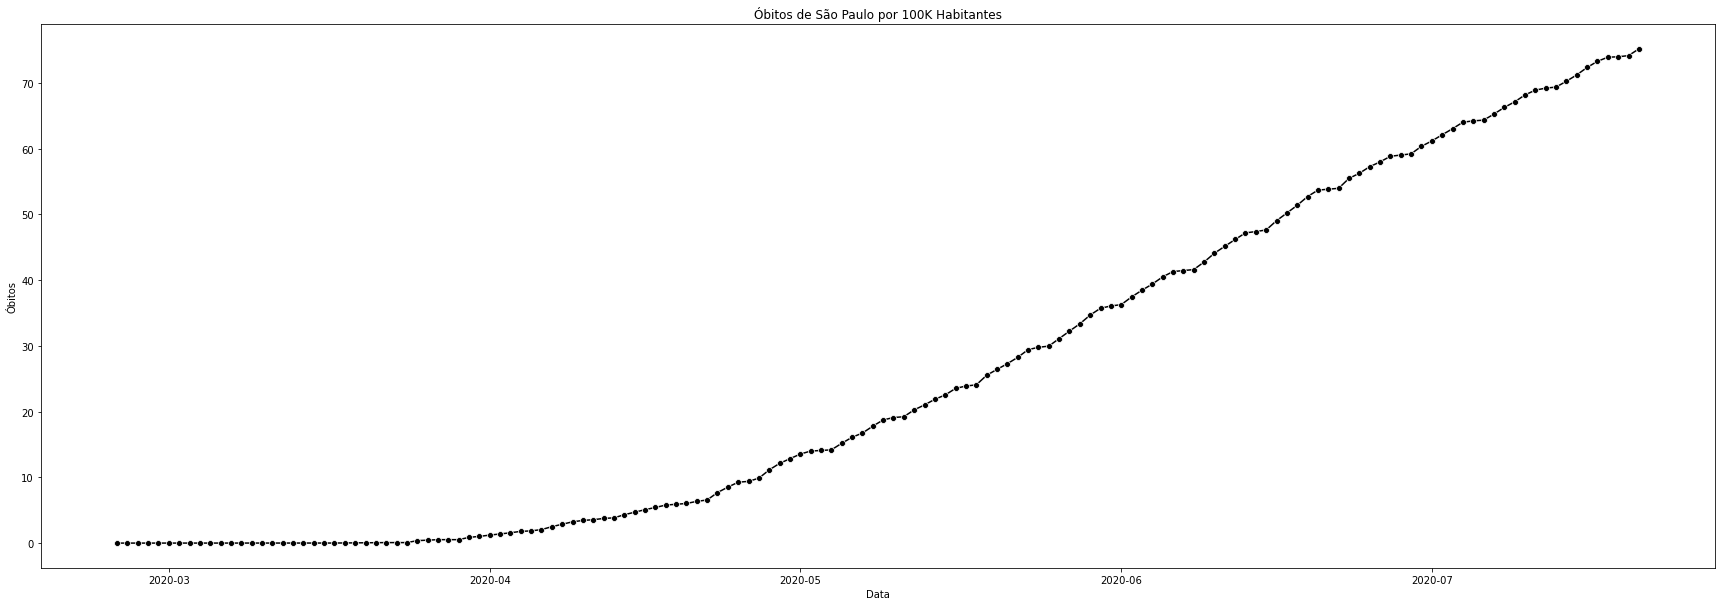

In [3]:
#Gráfico simples com óbitos/100K somente para uma cidade.
obitos_100K_SaoPaulo = DataCOVID19SP[DataCOVID19SP['nome_munic'] == 'São Paulo']

plt.figure(figsize=(30,10))
sns.lineplot(x='datahora',y='obitos_pc', color="black", marker='o', data=obitos_100K_SaoPaulo)

plt.xlabel('Data')
plt.ylabel('Óbitos')
plt.title('Óbitos de São Paulo por 100K Habitantes')

In [4]:
#Preparando o dataframe somente com cidades específicas.
#Só consegui partindo de uma como ponto de partida e adicionando outras posteriormente no for com o append.

obitos_mm7d_Selection = DataCOVID19SP[DataCOVID19SP['nome_munic'] == 'São Paulo']

for n in DataCOVID19SP['nome_munic']:
        if n in ('Guarulhos', 'Bauru', 'Itanhanhém', 'Santos', 'Santo André', 'São Bernardo do Campo', 'Campinas', 'Osasco', 'Barueri', 'Itapevi'):
            a = DataCOVID19SP[DataCOVID19SP['nome_munic'] == n]
            obitos_mm7d_Selection=obitos_mm7d_Selection.append(a)

            
#Doing the same for deaths each 100K inhab.
obitos_100K_Selection = DataCOVID19SP[DataCOVID19SP['nome_munic'] == 'São Paulo']

for n in DataCOVID19SP['nome_munic']:
        if n in ('Guarulhos', 'Bauru', 'Itanhanhém', 'Santos', 'Santo André', 'São Bernardo do Campo', 'Campinas', 'Osasco', 'Barueri', 'Itapevi'):
            a = DataCOVID19SP[DataCOVID19SP['nome_munic'] == n]
            obitos_100K_Selection=obitos_100K_Selection.append(a)

obitos_mm7d_Selection.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 197284 entries, 556 to 94472
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   nome_munic   197284 non-null  object        
 1   datahora     197284 non-null  datetime64[ns]
 2   obitos_mm7d  197284 non-null  float64       
 3   obitos_pc    197284 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 7.5+ MB


Text(0.5, 1.0, 'Óbitos - Média Móvel de 7 dias')

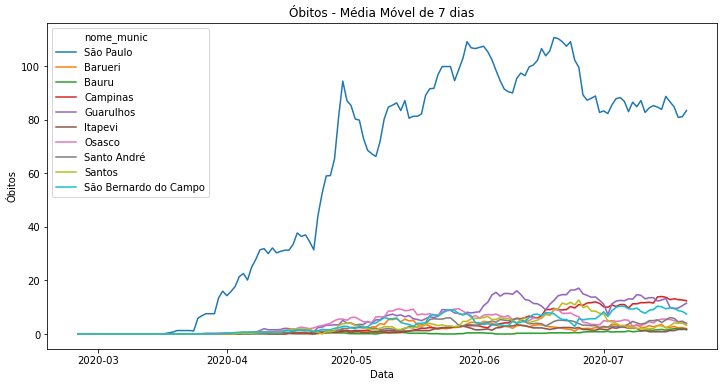

In [5]:
#Gerando o gráfico

fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.lineplot(x = "datahora", y = "obitos_mm7d", data = obitos_mm7d_Selection, hue='nome_munic')

plt.xlabel('Data')
plt.ylabel('Óbitos')
plt.title('Óbitos - Média Móvel de 7 dias')

Text(0.5, 1.0, 'Óbitos por 100K Habitantes')

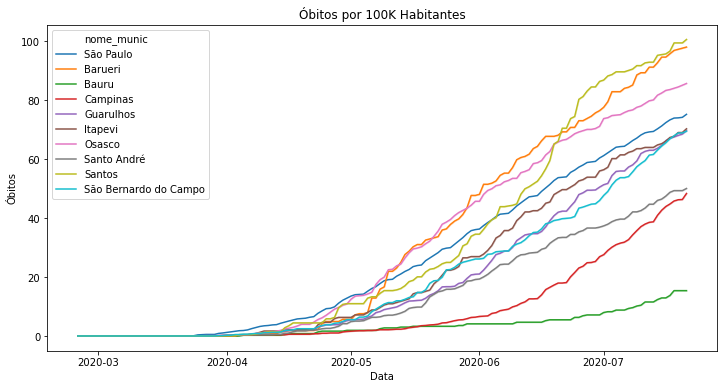

In [6]:
#Gerando o gráfico para mortes a cada 100K

fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.lineplot(x = "datahora", y = "obitos_pc", data = obitos_100K_Selection, hue='nome_munic')

plt.xlabel('Data')
plt.ylabel('Óbitos')
plt.title('Óbitos por 100K Habitantes')

                  nome_munic   datahora  obitos_mm7d  obitos_pc
81070              São Paulo 2020-06-30    82.714286  60.338710
80577                Barueri 2020-06-30     2.142857  76.402280
80580                  Bauru 2020-06-30     0.857143   7.138445
80621               Campinas 2020-06-30    11.428571  26.882150
80723              Guarulhos 2020-06-30    12.571429  50.470850
...                      ...        ...          ...        ...
80768                Itapevi 2020-06-30     1.857143  55.949590
80897                 Osasco 2020-06-30     3.428571  71.075710
81043            Santo André 2020-06-30     2.428571  36.894680
81051                 Santos 2020-06-30     7.714286  86.306840
81053  São Bernardo do Campo 2020-06-30     6.857143  45.931100

[1333 rows x 4 columns]


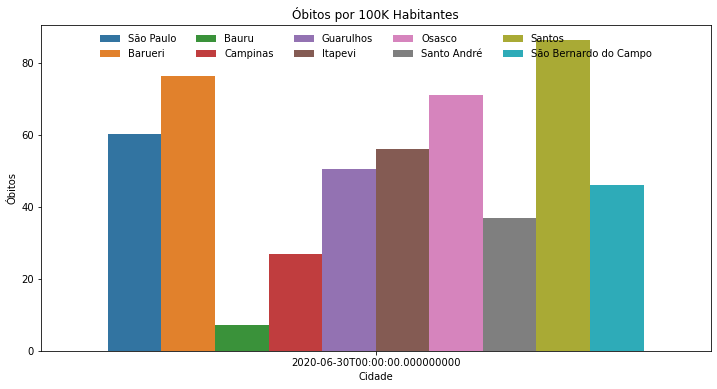

In [7]:
#Gerando o gráfico para mortes a cada 100K

last_obitos_100K_Selection = obitos_100K_Selection[obitos_100K_Selection['datahora'] == '2020-06-30']

fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = "datahora", y = "obitos_pc", data = last_obitos_100K_Selection, hue='nome_munic')

plt.xlabel('Cidade')
plt.ylabel('Óbitos')
plt.title('Óbitos por 100K Habitantes')
ax.legend(frameon=False, loc='upper center', ncol=5)

print(last_obitos_100K_Selection)